In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/LogoDetection/qmul_toplogo10/

/content/drive/My Drive/LogoDetection/qmul_toplogo10


In [3]:
import os
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [4]:
dir = "masks"
temp = os.path.join(str(dir))

boxes = np.zeros((700, 4))
cnt = 0

for temp_dir_name in sorted(os.listdir(temp)):

    print(temp_dir_name)
    tmp = os.path.join(str(dir) + '/' + str(temp_dir_name))

    for fil in sorted(os.listdir(tmp)):
      f = open(str(dir) + '/' + str(temp_dir_name) + '/' + str(fil), "r")
      
      contents = f.read()

      w1 = int(contents.split()[0])
      h1 = int(contents.split()[1])
      w2 = int(contents.split()[2]) + w1
      h2 = int(contents.split()[3]) + h1

      boxes[cnt][0] = w1
      boxes[cnt][1] = h1
      boxes[cnt][2] = w2
      boxes[cnt][3] = h2

      cnt += 1

print(type(boxes))

adidas0
chanel
gucci
hh
lacoste
mk
nike
prada
puma
supreme
<class 'numpy.ndarray'>


In [5]:
print(boxes)
boxes = np.reshape(boxes, (700, 4))
np.save('boxes', boxes)

[[567. 408. 730. 563.]
 [616.   7. 774. 118.]
 [283.  69. 369. 127.]
 ...
 [159. 226. 425. 339.]
 [293. 163. 368. 189.]
 [153. 160. 466. 267.]]


In [6]:
print(boxes.shape)

(700, 4)


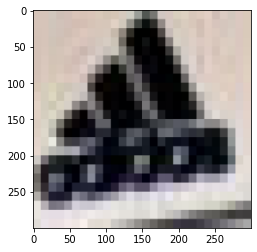

In [73]:
#This cell is meant to experiment with an image to try out different ways to augment it...
#After seeing the results on a few images, the dataset was augmented by taking the negative of every image using cv2.bitwise_not(image)... 
#other modifications can include the following...
"""
  image[: , :, 2] = 255 (or 0) OR image[:, :, 1] = 255 etc...
"""

import cv2
import matplotlib.pyplot as plt
image = cv2.imread("jpg/adidas0/adidas13.jpg")

box = boxes[4]
box = box.reshape((1,4))
w1 = int(box[0][0])
h1 = int(box[0][1])
w2 = int(box[0][2])
h2 = int(box[0][3])

tmpImg = np.zeros((h2 - h1, w2 - w1, 3))

tmpImg = image[h1:h2, w1:w2, :]

image = cv2.resize(tmpImg, (300, 300), interpolation = cv2.INTER_AREA)
# image = tmpImg
# plt.imshow(image)

# print(image.shape)

image = cv2.bitwise_not(image)
# image[ :, :, 2] = 255
# image = image / 255.0

# print(image)
plt.imshow(image)

In [77]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

labels = np.zeros(1400, dtype = 'uint8')
images = np.zeros((1400,300,300,3), dtype = 'uint8')
cnt = 0

dir = "jpg"
temp = os.path.join(str(dir))

for temp_dir_name in sorted(os.listdir(temp)):

    print(temp_dir_name)
    tmp = os.path.join(str(dir) + '/' + str(temp_dir_name))

    for image in sorted(os.listdir(tmp)):
      if image.endswith(".jpg") or image.endswith(".png"):
        im = cv2.imread(str(dir) + '/' + str(temp_dir_name) + '/' + str(image))

        box = boxes[cnt//2]
        box = box.reshape((1,4))
        w1 = int(box[0][0])
        h1 = int(box[0][1])
        w2 = int(box[0][2])
        h2 = int(box[0][3])

        tmpImg = np.zeros((h2 - h1, w2 - w1, 3))

        tmpImg = im[h1:h2, w1:w2, :]

        tmpImg = cv2.resize(tmpImg, (300, 300), interpolation = cv2.INTER_AREA)
        tmpImg1 = cv2.bitwise_not(tmpImg)
        
        images[cnt] = tmpImg
        images[cnt + 1] = tmpImg1

        cnt += 2

adidas0
chanel
gucci
hh
lacoste
mk
nike
prada
puma
supreme


In [0]:
images = images / 255.0

In [0]:
target_labels = np.zeros((1400,10))
lbl = -1
for i in range(0,1400):
  if i%140 == 0:
    lbl = lbl + 1
  target_labels[i][lbl] = 1
  

In [0]:
from sklearn.utils import shuffle
# final_images, final_labels = shuffle(images, target_labels)
final_images, final_labels = images, target_labels

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(final_images, final_labels, test_size = 0.3, shuffle = True)

In [95]:
import keras
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense
from keras.models import Sequential

cnn_model = Sequential()

cnn_model.add(Conv2D (kernel_size = (3,3), filters = 16, input_shape = X_train.shape[1:], activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = 2))

cnn_model.add(Conv2D(kernel_size = (3,3), filters = 32, activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPooling2D(pool_size = 2))
 
cnn_model.add(Conv2D(kernel_size = (5,5), filters = 64, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(MaxPooling2D(pool_size = 2))

cnn_model.add(Conv2D(kernel_size = (5, 5), filters = 128, activation='relu'))
# cnn_model.add(Dropout(0.1))
cnn_model.add(MaxPooling2D(pool_size = 2))

cnn_model.add(GlobalAveragePooling2D())

cnn_model.add(Dense(10, activation = 'softmax'))

cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
dropout_5 (Dropout)          (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 69, 69, 64)        51264     
_________________________________________________________________
dropout_6 (Dropout)          (None, 69, 69, 64)       

In [0]:
#Compile the model 
from keras.optimizers import adam

myopt = adam( lr = 0.001, decay = 1e-5)

cnn_model.compile(optimizer = myopt, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [108]:
H = cnn_model.fit(X_train, Y_train, epochs = 10, verbose=1) #Observe accuracy, train for 100+ epochs or till accuracy goes to 0.95
#Accuracy went upto 1.0 when trained for 150(approx) epochs

Epoch 1/10
980/980 [==============================] - 2s 2ms/step - loss: 0.0308 - acc: 0.9908
Epoch 2/10
980/980 [==============================] - 2s 2ms/step - loss: 0.0329 - acc: 0.9949
Epoch 3/10
980/980 [==============================] - 2s 2ms/step - loss: 0.0213 - acc: 0.9959
Epoch 4/10
980/980 [==============================] - 2s 2ms/step - loss: 0.0131 - acc: 0.9990
Epoch 5/10
980/980 [==============================] - 2s 2ms/step - loss: 0.0096 - acc: 0.9990
Epoch 6/10
980/980 [==============================] - 2s 2ms/step - loss: 0.0102 - acc: 0.9980
Epoch 7/10
980/980 [==============================] - 2s 2ms/step - loss: 0.0088 - acc: 1.0000
Epoch 8/10
980/980 [==============================] - 2s 2ms/step - loss: 0.0060 - acc: 1.0000
Epoch 9/10
980/980 [==============================] - 2s 2ms/step - loss: 0.0043 - acc: 1.0000
Epoch 10/10
980/980 [==============================] - 2s 2ms/step - loss: 0.0037 - acc: 1.0000


In [109]:
cnn_model.evaluate(X_test,Y_test, verbose = 1)  #Highest observed accuracy yet was 0.75

420/420 [==============================] - 1s 1ms/step


[1.1691753882737386, 0.7404761904761905]